# Data Wrangling

### Table of contents

1. [Introduction](#intro)<br>
2. [Gathering Data](#gathering)<br>
3. [Assessing](#assessing)<br>
3.1 [Quality](#quality)<br>
3.1 [Tidiness](#tidiness)<br>
4. [Cleaning data](#cleaning)<br>
5. [Storing, analyzing and visualizing data](#analysis)<br>
5.1 [Insight One ](#insightOne)

<a id='intro'></a>
## Introduction

The purpose of this project is to put in practice what I learned in data wrangling data section from Udacity Data Analysis Nanodegree program. Real-world data rarely comes clean.In this project using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. I will document the wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries).

The dataset that you will be wrangled, analyzed and visualized  is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though is almost always greater than 10. 11/10, 12/10, 13/10, etc. WeRateDogs has over 4 million followers and has received international media coverage.

<a id='gathering'></a>
## Gathering Data

1. First download the twitter archive file manually. <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv">twitter_archive_enhanced.csv </a>

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
3. Twitter API & JSON: Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting.  Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

1. #### Twitter archive file

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

In [2]:
#Read the twitter_archive_enhanced data
twitter_archive_df = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#see the information about each column
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2. #### The Image Predictions file

In [4]:
#Download the file programatically using the request library and url provided above
url  = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
re = requests.get(url)
with open("image-predictions.csv",  mode ='wb') as file:
    file.write(re.content)
    
image_predictions_df = pd.read_csv("image-predictions.csv" , sep='\t')
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Twitter API and JSON data

In [ ]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
tweets_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:
    for line in json_file:
        data = json.loads(line)
        tweet_id  = data['id']
        whole_tweet = data['full_text']
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']
        date_time = data['created_at']
        only_url = whole_tweet[whole_tweet.find('https'):]
        retweeted_status = data['retweeted_status'] = data.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'
        
        
        tweets_list.append({'tweet_id': int(tweet_id),
                        'tweet': whole_tweet,
                        'favorites': int(favorite_count),
                        'favorites': int(favorite_count),
                        'retweets': int(retweet_count),
                        'url': url,
                        'retweeted_status': retweeted_status,
                        'created_at': pd.to_datetime(date_time)})

JSONDecodeError: Expecting value: line 1 column 2176 (char 2175)

In [6]:
tweets_json_df = pd.DataFrame(tweets_list)
tweets_json_df.to_csv("tweets_json.csv", index=False)
tweets_list

[{'tweet_id': 892420643555336193,
  'tweet': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'favorites': 39467,
  'retweets': 8853,
  'url': 'https://t.co/MgUWQ76dJU',
  'retweeted_status': 'Original tweet',
  'created_at': Timestamp('2017-08-01 16:23:56+0000', tz='UTC')},
 {'tweet_id': 892177421306343426,
  'tweet': "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
  'favorites': 33819,
  'retweets': 6514,
  'url': 'https://t.co/0Xxu71qeIV',
  'retweeted_status': 'Original tweet',
  'created_at': Timestamp('2017-08-01 00:17:27+0000', tz='UTC')},
 {'tweet_id': 891815181378084864,
  'tweet': 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
  'favorites': 25461,
  'retweets': 4328,
  'url': 'https://t.co/wUnZ

In [7]:
tweets_json_df = pd.read_csv("tweets_json.csv")
tweets_json_df.head()

,tweet_id,tweet,favorites,retweets,url,retweeted_status,created_at
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,39467,8853,https://t.co/MgUWQ76dJU,Original tweet,2017-08-01 16:23:56+00:00
1,892177421306343426,This is Tilly. She's just checking pup on you....,33819,6514,https://t.co/0Xxu71qeIV,Original tweet,2017-08-01 00:17:27+00:00
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,25461,4328,https://t.co/wUnZnhtVJB,Original tweet,2017-07-31 00:18:03+00:00
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,42908,8964,https://t.co/tD36da7qLQ,Original tweet,2017-07-30 15:58:51+00:00
4,891327558926688256,This is Franklin. He would like you to stop ca...,41048,9774,https://t.co/AtUZn91f7f,Original tweet,2017-07-29 16:00:24+00:00


In [8]:
tweets_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891 entries, 0 to 1890
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1891 non-null   int64 
 1   tweet             1891 non-null   object
 2   favorites         1891 non-null   int64 
 3   retweets          1891 non-null   int64 
 4   url               1891 non-null   object
 5   retweeted_status  1891 non-null   object
 6   created_at        1891 non-null   object
dtypes: int64(3), object(4)
memory usage: 103.5+ KB


<a id='assessing'></a>
## Assessing Data

### Visual assessment

####  Twitter arcive data

In [9]:
twitter_archive_df.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
358,830097400375152640,NaN,NaN,2017-02-10 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Samson. He's absolute fluffy perfection. ...,NaN,NaN,NaN,"https://www.gofundme.com/sick-baby-samson,http...",13,10,Samson,None,None,None,None
1806,676936541936185344,NaN,NaN,2015-12-16 01:27:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a rare pouched pupper. Ample stora...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676936541...,8,10,None,None,None,pupper,None
1435,697259378236399616,NaN,NaN,2016-02-10 03:22:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in saber-toothed tigers. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697259378...,8,10,getting,None,None,None,None
1271,709409458133323776,NaN,NaN,2016-03-14 16:02:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Billy. He sensed a squirrel. 8/10 damn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709409458...,8,10,Billy,None,None,None,None
1879,675015141583413248,NaN,NaN,2015-12-10 18:12:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Moe. He's a golden Fetty Woof. Doesn't re...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675015141...,10,10,Moe,None,None,None,None
2137,670046952931721218,NaN,NaN,2015-11-27 01:10:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ben &amp; Carson. It's impossible for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670046952...,11,10,Ben,None,None,None,None
1350,704113298707505153,NaN,NaN,2016-02-29 01:17:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stanley. He's an inverted Uzbekistani wat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704113298...,8,10,Stanley,None,None,None,None
376,828046555563323392,NaN,NaN,2017-02-05 01:04:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sailer. He waits on the roof for his o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828046555...,13,10,Sailer,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
2118,670420569653809152,NaN,NaN,2015-11-28 01:54:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Damon. The newest presidential candida...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670420569...,10,10,Damon,None,None,None,None


In [10]:
twitter_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [11]:
twitter_archive_df[twitter_archive_df['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [12]:
twitter_archive_df[twitter_archive_df['name'].apply(len) <= 2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [13]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Image Predictions data

In [15]:
image_predictions_df.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
658,682389078323662849,https://pbs.twimg.com/media/CXhVKtvW8AAyiyK.jpg,1,curly-coated_retriever,0.482288,True,flat-coated_retriever,0.315286,True,Great_Dane,0.062179,True
526,676613908052996102,https://pbs.twimg.com/media/CWPQwmJWUAAu_At.jpg,1,book_jacket,0.493790,False,Doberman,0.096423,True,miniature_pinscher,0.070647,True
752,688116655151435777,https://pbs.twimg.com/media/CYyucekVAAESj8K.jpg,1,pug,0.973819,True,Chihuahua,0.010891,True,Staffordshire_bullterrier,0.006864,True
402,673697980713705472,https://pbs.twimg.com/media/CVl0vFeWoAAMTfg.jpg,1,porcupine,0.151876,False,hen,0.111380,False,doormat,0.058934,False
1556,793210959003287553,https://pbs.twimg.com/media/CwINKJeW8AYHVkn.jpg,1,doormat,0.874431,False,French_bulldog,0.018759,True,Boston_bull,0.015134,True
1647,808733504066486276,https://pbs.twimg.com/media/Czky0v9VIAEXRkd.jpg,1,seat_belt,0.779137,False,toy_poodle,0.036927,True,golden_retriever,0.016972,True
1677,813187593374461952,https://pbs.twimg.com/media/C0kFzOQUoAAt6yb.jpg,1,golden_retriever,0.888181,True,Labrador_retriever,0.042312,True,Saluki,0.009702,True
755,688385280030670848,https://pbs.twimg.com/media/CY2iwGNWUAI5zWi.jpg,2,golden_retriever,0.900437,True,cocker_spaniel,0.022292,True,sombrero,0.014997,False
1856,841439858740625411,https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg,3,military_uniform,0.853684,False,Labrador_retriever,0.048200,True,groenendael,0.015394,True
770,689289219123089408,https://pbs.twimg.com/ext_tw_video_thumb/68928...,1,snowmobile,0.254642,False,assault_rifle,0.129558,False,rifle,0.110875,False


In [16]:
image_predictions_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [17]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Twitter api data

In [19]:
tweets_json_df.sample(15)

,tweet_id,tweet,favorites,retweets,url,retweeted_status,created_at
66,879376492567855104,This is Jack AKA Stephen Furry. You're not sco...,17099,3261,https://t.co/0gOi601EAa,Original tweet,2017-06-26 16:31:08+00:00
1091,737310737551491075,Everybody stop what you're doing and watch the...,16040,8329,https://t.co/wvjqSCN6iC,Original tweet,2016-05-30 15:52:33+00:00
993,748346686624440324,"""So... we meat again"" (I'm so sorry for that p...",5735,1413,https://t.co/XFBrrqapZa,Original tweet,2016-06-30 02:45:28+00:00
1675,682059653698686977,This is Tess. Her main passions are shelves an...,5442,1915,https://t.co/IriJlVZ6m4,Original tweet,2015-12-30 04:44:28+00:00
482,814986499976527872,This is Cooper. Someone attacked him with a sh...,8485,1505,https://t.co/01vpuRDXQ8,Original tweet,2016-12-31 00:08:17+00:00
1878,675006312288268288,Say hello to Mollie. This pic was taken after ...,1057,252,https://t.co/QMmAqA9VqO,Original tweet,2015-12-10 17:37:00+00:00
815,770772759874076672,This is Sebastian. He's super h*ckin fluffy. T...,5749,1626,https://t.co/lqr0NdtwQo,Original tweet,2016-08-30 23:58:40+00:00
1572,687480748861947905,Another magnificent photo. 12/10 https://t.co/...,1760,281,https://t.co/X5w387K5jr,Original tweet,2016-01-14 03:45:57+00:00
29,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,117,4,n,Original tweet,2017-07-15 16:51:35+00:00
451,818614493328580609,This is Bear. He's a passionate believer of th...,10971,2982,https://t.co/FOF0hBDxP8,Original tweet,2017-01-10 00:24:38+00:00


In [20]:
tweets_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891 entries, 0 to 1890
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1891 non-null   int64 
 1   tweet             1891 non-null   object
 2   favorites         1891 non-null   int64 
 3   retweets          1891 non-null   int64 
 4   url               1891 non-null   object
 5   retweeted_status  1891 non-null   object
 6   created_at        1891 non-null   object
dtypes: int64(3), object(4)
memory usage: 103.5+ KB


In [21]:
tweets_json_df.describe()

,tweet_id,favorites,retweets
count,1.891000e+03,1891.000000,1891.000000
mean,7.604421e+17,9690.404019,3776.649392
std,6.514044e+16,12574.836709,5693.256182
min,6.747540e+17,0.000000,0.000000
25%,6.983023e+17,2541.500000,1004.500000
50%,7.525197e+17,4878.000000,2017.000000
75%,8.162143e+17,12469.000000,4268.000000
max,8.924206e+17,132810.000000,79515.000000


<a id="quality"></a>
### Quality Issues

#### twitter_archive

 <li> Keep only original ratings (no retweets)</li>
 <li> Delete columns that won't be used for analysis</li>
 <li> Separate timestamp into 3 columns: day, month and year </li>
 <li> Correct numerators with decimals</li>
 <li> Correc denominators other than 10:
</li>



#### image_prediction

<li> Drop all  duplicated jpg_urls</li>
<li> Create two columns for image prediction and confidence level </li>
<li> Delete columns that won't be used for analysis</li>

#### tweet_json

- Keep original tweets only

<a id="tidiness"></a>
### Tidiness issues

- Change tweet_id to type int64 in order to merge with the other 2 tables
- All tables should be part of one dataset

<a id="cleaning"></a>
## Cleaning data

### Quality issues <a id ="quality"></a>

 #### 1. Twitter archive data -- keep original ratings only

Based on info, there are 181 values in retweeted_status_id and retweeted_status_user_id. Delete all the retweets. Once merged  twitter_archive and image_prediction, I will only keep the ones with images.

In [22]:
image_predictions_df_clean = image_predictions_df.copy()
twitter_archive_df_clean = twitter_archive_df.copy()
tweets_json_df_clean = tweets_json_df.copy()

In [23]:
# Delete retweets by filtering the NaN of retweeted_status_user_id
twitter_archive_df_clean = twitter_archive_df_clean[pd.isnull(twitter_archive_df_clean['retweeted_status_user_id'])]

#TEST
print(sum(twitter_archive_df_clean.retweeted_status_user_id.value_counts()))

0


 #### 2. Twitter archive data -- Delete columns that won't be used for analysis

In [24]:
#get the column names of twitter_archive_clean
print(list(twitter_archive_df_clean))

#CODE: Delete columns no needed
twitter_archive_df_clean = twitter_archive_df_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls', 'doggo', 'floofer', 'pupper', 'puppo'], 1)

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [25]:
print(list(twitter_archive_df_clean))

['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name']


 #### 3. Twitter archive data -- Separate timestamp into 3 columns: day, month and year

In [26]:
# First convert timestamp into datetime, than extrach each required value i.e year, month and day
twitter_archive_df_clean['timestamp'] = pd.to_datetime(twitter_archive_df_clean['timestamp'])

#extract year, month and day to new columns
twitter_archive_df_clean['year'] = twitter_archive_df_clean['timestamp'].dt.year
twitter_archive_df_clean['month'] = twitter_archive_df_clean['timestamp'].dt.month
twitter_archive_df_clean['day'] = twitter_archive_df_clean['timestamp'].dt.day

#Finally drop timestamp column
twitter_archive_df_clean = twitter_archive_df_clean.drop('timestamp', 1)

In [27]:
print(list(twitter_archive_df_clean))

['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name', 'year', 'month', 'day']


In [28]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   text                2175 non-null   object
 2   rating_numerator    2175 non-null   int64 
 3   rating_denominator  2175 non-null   int64 
 4   name                2175 non-null   object
 5   year                2175 non-null   int64 
 6   month               2175 non-null   int64 
 7   day                 2175 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 152.9+ KB


#### 4. Twitter archive data --Correct numerators with decimals

In [29]:
#First change numerator and denominators type int to float to allow decimals 
twitter_archive_df_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_df_clean[['rating_numerator','rating_denominator']].astype(float)

twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   text                2175 non-null   object 
 2   rating_numerator    2175 non-null   float64
 3   rating_denominator  2175 non-null   float64
 4   name                2175 non-null   object 
 5   year                2175 non-null   int64  
 6   month               2175 non-null   int64  
 7   day                 2175 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 152.9+ KB


In [30]:
twitter_archive_df_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_df_clean[['rating_numerator','rating_denominator']].astype(float)

#Update numerators
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

with pd.option_context('max_colwidth', 200):
    display(twitter_archive_df_clean[twitter_archive_df_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\caaaq\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


#### 5. Twitter archive data -- Correc denominators other than 10

Some tweets have denominator not equal to 10 for special circunstances. Update both numerators and denominators when necessary. Delete other tweets which do not have actual ratings.

In [31]:
# Update both numerators and denominators
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

# Delete five tweets with no actual ratings
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] != 832088576586297345]
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] != 810984652412424192]
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] != 682808988178739200]
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] != 835246439529840640]
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] != 686035780142297088]

#TEST: Left only the group dogs for programatically clean
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_df_clean[twitter_archive_df_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
1634,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0


<b>It si important to Note that </b> These tweets with denominator not equal to 10 are multiple dogs. For example, tweet_id 713900603437621000 has numerator and denominators 99/90 because there are 9 dogs in the picture

In [32]:
# Create a new column with rating in float type to avoid converting all int column to float
twitter_archive_df_clean['rating'] = 10 * twitter_archive_df_clean['rating_numerator'] / twitter_archive_df_clean['rating_denominator'].astype(float)
twitter_archive_df_clean.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,year,month,day,rating
48,882992080364220416,This is Rusty. He wasn't ready for the first p...,13.0,10.0,Rusty,2017,7,6,13.0
2102,670679630144274432,This is Pluto. He's holding little waddling do...,8.0,10.0,Pluto,2015,11,28,8.0
1878,675047298674663426,This is a fluffy albino Bacardi Columbia mix. ...,11.0,10.0,a,2015,12,10,11.0
1521,690690673629138944,This is Cedrick. He's a spookster. Did me a di...,10.0,10.0,Cedrick,2016,1,23,10.0
1263,710117014656950272,This pupper got her hair chalked for her birth...,11.0,10.0,None,2016,3,16,11.0


#### 6. Image predictions data -- Drop all 66 duplicated jpg_urls

In [33]:
# Delete duplicated jpg_url
image_predictions_df_clean = image_predictions_df_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#TEST
sum(image_predictions_df_clean['jpg_url'].duplicated())

0

#### 7. Image predictions data -- Create two columns for image prediction and confidence level

In [34]:
# The first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_predictions_df_clean):
    if image_predictions_df_clean['p1_dog'] == True:
        dog_type.append(image_predictions_df_clean['p1'])
        confidence_list.append(image_predictions_df_clean['p1_conf'])
    elif image_predictions_df_clean['p2_dog'] == True:
        dog_type.append(image_predictions_df_clean['p2'])
        confidence_list.append(image_predictions_df_clean['p2_conf'])
    elif image_predictions_df_clean['p3_dog'] == True:
        dog_type.append(image_predictions_df_clean['p3'])
        confidence_list.append(image_predictions_df_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_predictions_df_clean.apply(image, axis=1)

#create new columns
image_predictions_df_clean['dog_type'] = dog_type
image_predictions_df_clean['confidence_list'] = confidence_list

In [35]:
#drop rows that has prediction_list 'error'
image_predictions_df_clean = image_predictions_df_clean[image_predictions_df_clean['dog_type'] != 'Error']
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1691 non-null   int64  
 1   jpg_url          1691 non-null   object 
 2   img_num          1691 non-null   int64  
 3   p1               1691 non-null   object 
 4   p1_conf          1691 non-null   float64
 5   p1_dog           1691 non-null   bool   
 6   p2               1691 non-null   object 
 7   p2_conf          1691 non-null   float64
 8   p2_dog           1691 non-null   bool   
 9   p3               1691 non-null   object 
 10  p3_conf          1691 non-null   float64
 11  p3_dog           1691 non-null   bool   
 12  dog_type         1691 non-null   object 
 13  confidence_list  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


#### 8. Image predictions data -- Delete columns that won't be used for analysis

In [36]:
#CODE: print list of image_prediction columns
print(list(image_predictions_df_clean))

#Delete columns
image_predictions_df_clean = image_predictions_df_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

#TEST
list(image_predictions_df_clean)

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type', 'confidence_list']


['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']

#### 9. Tweets json data -- Keep original tweets only

In [40]:
tweets_json_df_clean = tweets_json_df_clean[tweets_json_df['retweeted_status'] == 'Original tweet']
tweets_json_df_clean['retweeted_status'].value_counts()

<ipython-input-40-d0c45999a6c8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tweets_json_df_clean = tweets_json_df_clean[tweets_json_df['retweeted_status'] == 'Original tweet']


Original tweet    1714
Name: retweeted_status, dtype: int64

### Tidiness issues

#### 1. Change tweet_id to type int64 in order to merge with the other 2 tables

In [41]:
tweets_json_df_clean['tweet_id'] = tweets_json_df_clean['tweet_id'].astype(np.int64)
tweets_json_df_clean['tweet_id'].dtypes

dtype('int64')

#### 2. All tables should be part of one dataset

In [42]:
# Create a new dataframe that merge twitter_archive_df_clean and image_predictions_df_clean
master_df1 = pd.merge(twitter_archive_df_clean, 
                      image_predictions_df_clean, 
                      how = 'left', on = ['tweet_id'])
#keep rows that have picture (jpg_url)
master_df1 = master_df1[master_df1['jpg_url'].notnull()]
master_df1.head()

,tweet_id,text,rating_numerator,rating_denominator,name,year,month,day,rating,jpg_url,dog_type,confidence_list
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,2017,8,1,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,2017,7,31,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,2017,7,30,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,2017,7,29,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
5,891087950875897856,Here we have a majestic great white breaching ...,13.0,10.0,None,2017,7,29,13.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595


In [43]:
# Create a new master dataframe that merge tweets_json_df_clean and master_df1
master_df = pd.merge(master_df1, tweets_json_df_clean, 
                      how = 'left', on = ['tweet_id'])
master_df.head()

,tweet_id,text,rating_numerator,rating_denominator,name,year,month,day,rating,jpg_url,dog_type,confidence_list,tweet,favorites,retweets,url,retweeted_status,created_at
0,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,2017,8,1,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,This is Tilly. She's just checking pup on you....,33819.0,6514.0,https://t.co/0Xxu71qeIV,Original tweet,2017-08-01 00:17:27+00:00
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,2017,7,31,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,This is Archie. He is a rare Norwegian Pouncin...,25461.0,4328.0,https://t.co/wUnZnhtVJB,Original tweet,2017-07-31 00:18:03+00:00
2,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,2017,7,30,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,This is Darla. She commenced a snooze mid meal...,42908.0,8964.0,https://t.co/tD36da7qLQ,Original tweet,2017-07-30 15:58:51+00:00
3,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,2017,7,29,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,This is Franklin. He would like you to stop ca...,41048.0,9774.0,https://t.co/AtUZn91f7f,Original tweet,2017-07-29 16:00:24+00:00
4,891087950875897856,Here we have a majestic great white breaching ...,13.0,10.0,None,2017,7,29,13.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,Here we have a majestic great white breaching ...,20562.0,3261.0,https://t.co/kQ04fDDRmh,Original tweet,2017-07-29 00:08:17+00:00


In [44]:
# Save the master dataframe
master_df.to_csv("twitter_archive_master.csv", index= False)

In [45]:
master_df.head()

,tweet_id,text,rating_numerator,rating_denominator,name,year,month,day,rating,jpg_url,dog_type,confidence_list,tweet,favorites,retweets,url,retweeted_status,created_at
0,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,2017,8,1,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,This is Tilly. She's just checking pup on you....,33819.0,6514.0,https://t.co/0Xxu71qeIV,Original tweet,2017-08-01 00:17:27+00:00
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,2017,7,31,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,This is Archie. He is a rare Norwegian Pouncin...,25461.0,4328.0,https://t.co/wUnZnhtVJB,Original tweet,2017-07-31 00:18:03+00:00
2,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,2017,7,30,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,This is Darla. She commenced a snooze mid meal...,42908.0,8964.0,https://t.co/tD36da7qLQ,Original tweet,2017-07-30 15:58:51+00:00
3,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,2017,7,29,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,This is Franklin. He would like you to stop ca...,41048.0,9774.0,https://t.co/AtUZn91f7f,Original tweet,2017-07-29 16:00:24+00:00
4,891087950875897856,Here we have a majestic great white breaching ...,13.0,10.0,None,2017,7,29,13.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,Here we have a majestic great white breaching ...,20562.0,3261.0,https://t.co/kQ04fDDRmh,Original tweet,2017-07-29 00:08:17+00:00


## <a id="analysis"></a>  Storing, Analyzing, and Visualizing Data

### Insight one plus visualization

First let's perform a simple valu counts on the dog_type columns to see whic dog is the most common in this dataset

In [46]:
master_df['dog_type'].value_counts()

golden_retriever      142
Labrador_retriever    103
Pembroke               94
Chihuahua              87
pug                    60
                     ... 
Irish_wolfhound         1
EntleBucher             1
silky_terrier           1
standard_schnauzer      1
Scotch_terrier          1
Name: dog_type, Length: 113, dtype: int64

golden_retriever is the most common dog type in the dataset, Labrador_retriever and Pembroke coming next.

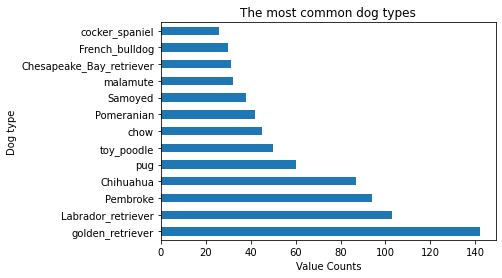

In [47]:
dog_types = master_df.groupby('dog_type').filter(lambda x: len(x) >= 25)

dog_types['dog_type'].value_counts().plot(kind = 'barh')
plt.title('The most common dog types')
plt.xlabel('Value Counts')
plt.ylabel('Dog type')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

### Insight two

Which dog type has the highest average rating ?

In [48]:
master_df.groupby('dog_type')['rating'].mean().sort_values(ascending=False)

dog_type
Bouvier_des_Flandres           13.000000
Saluki                         12.500000
briard                         12.333333
Irish_setter                   12.333333
Border_terrier                 12.142857
                                 ...    
Scotch_terrier                  9.000000
Walker_hound                    9.000000
soft-coated_wheaten_terrier     8.800000
Afghan_hound                    8.000000
Japanese_spaniel                5.000000
Name: rating, Length: 113, dtype: float64

The Bouvier_des_Flandres seems to have the highest average rating with about 13 out of 10 average rating

In [52]:
master_df.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'year', 'month', 'day', 'rating', 'jpg_url', 'dog_type',
       'confidence_list', 'tweet', 'favorites', 'retweets', 'url',
       'retweeted_status', 'created_at'],
      dtype='object')

### Insight three
Which dog type whose tweets related to it have the most favorites/likes ?

In [58]:
master_df.groupby('dog_type')['favorites'].sum().sort_values(ascending=False)

dog_type
golden_retriever      1583506.0
Labrador_retriever    1094077.0
Pembroke               937387.0
Chihuahua              538992.0
French_bulldog         514481.0
                        ...    
standard_schnauzer       2046.0
groenendael              1896.0
Japanese_spaniel         1362.0
Brabancon_griffon           0.0
Irish_wolfhound             0.0
Name: favorites, Length: 113, dtype: float64

It seems tweets related to the golden_retriever had the most likes. However in this case we cant say that means people favoured them, but it may be due to the fact taht golden_retriever was the most common dog type thus more tweets were about it than the rest of the other types.

### Insight four plus visualization

Does tweets with higher ratings get more likes or more retweets ?

In [69]:
master_df['favorites'].corr(master_df['rating'])

0.4045558489649

In [70]:
master_df['retweets'].corr(master_df['rating'])

0.2901295089298248

According to the correlation between the two varaibles dog's ratings is weekly correlated with that tweets favorites and the same can be said about the retweets. Below is a heatmap showing the correlation visually.

Text(0.5, 1.0, 'Correlation Heat Map')

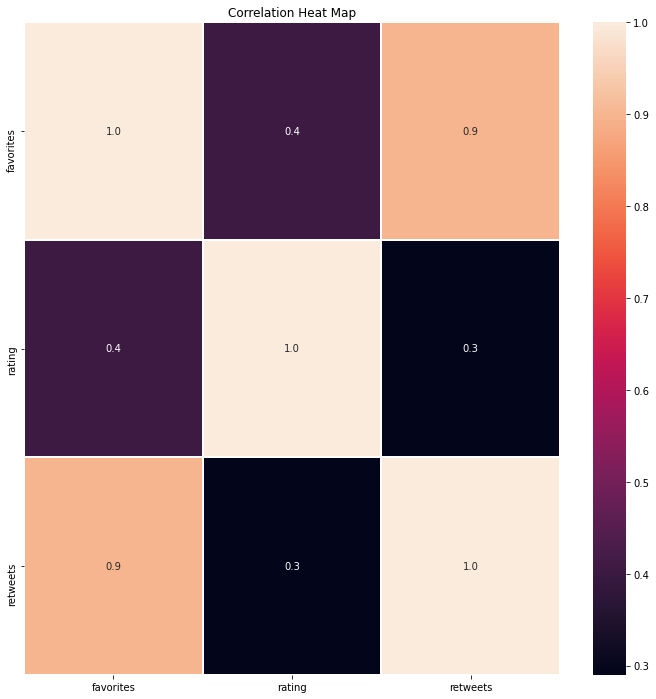

In [71]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(master_df[['favorites','rating', 'retweets']].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation Heat Map')